In [ ]:
from keras.datasets import mnist,cifar10

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
import tensorflow as tf

def resize_dataset(dataset, new_size=(224, 224)):
    dataset_resized = tf.map_fn(lambda img: tf.image.resize(img, new_size), dataset, dtype=tf.float32)
    return dataset_resized.numpy()  # Convert back to NumPy to avoid TensorFlow memory issues

# Normalize first (optional)
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

# Resize safely
x_train_cifar_n = resize_dataset(x_train_cifar)
x_test_cifar_n = resize_dataset(x_test_cifar)

Instructions for updating:
Use fn_output_signature instead


In [ ]:
print(x_test_mnist.shape)
print(y_test_cifar.shape)

In [ ]:
import tensorflow as tf

# Resize images only, keeping the labels as they are
x_train_cifar_resized = tf.image.resize(x_train_cifar, (224, 224))
x_test_cifar_resized = tf.image.resize(x_test_cifar, (224, 224))

# Labels remain unchanged
y_train_cifar_resized = y_train_cifar
y_test_cifar_resized = y_test_cifar


In [ ]:
from keras.applications import ResNet50
from keras import Model
from keras.models import Sequential
from keras.layers import Dense,Flatten

model_Res50=ResNet50(weights="imagenet",include_top=False,input_shape=(32,32,3))

top_layer=Flatten()(model_Res50.output)
top_layer=Dense(200,activation="relu")(top_layer)
top_layer=Dense(10,activation="softmax")(top_layer)

cfair_model_Res50=Model(inputs=model_Res50.input,outputs=top_layer)


In [ ]:
cfair_model_Res50.compile(
    optimizer="RMSprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

cfair_history=cfair_model_Res50.fit(
    x_train_cifar,y_train_cifar,
    epochs=10,batch_size=512,
    validation_data=(x_test_cifar,y_test_cifar),
    verbose=2
)

In [ ]:
cfair_model_Res50.predict(

)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to match CNN input (28x28 images with 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), strides=2, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), strides=2, activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2)


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6720 - loss: 1.1114 - val_accuracy: 0.9286 - val_loss: 0.2357
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9322 - loss: 0.2248 - val_accuracy: 0.9541 - val_loss: 0.1534
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9559 - loss: 0.1471 - val_accuracy: 0.9608 - val_loss: 0.1275
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9624 - loss: 0.1249 - val_accuracy: 0.9639 - val_loss: 0.1155
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9661 - loss: 0.1114 - val_accuracy: 0.9672 - val_loss: 0.1014
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9691 - loss: 0.0959 - val_accuracy: 0.9695 - val_loss: 0.0980
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9726 - loss: 0.0859 - val_accuracy: 0.9700 - val_loss: 0.0971
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9729 - loss: 0.0848 - val_ac

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


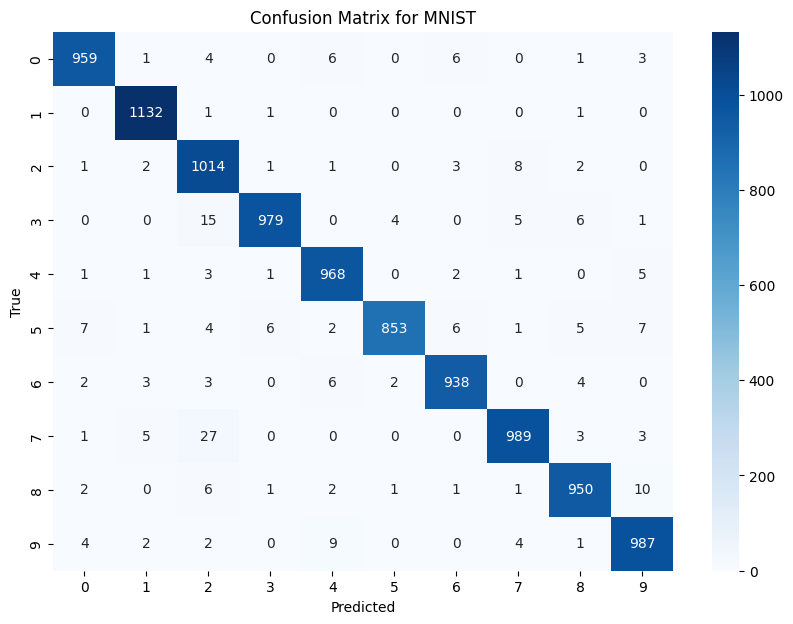

AUC Score: 0.9997


In [ ]:
# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Model Evaluation
accuracy = np.mean(y_pred_classes == y_true)
precision = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['precision']
recall = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['recall']
f1_score = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['f1-score']

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MNIST')
plt.show()

# ROC Curve & AUC
auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC Score: {auc_score:.4f}")


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2)


Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 166ms/step - accuracy: 0.2952 - loss: 1.9202 - val_accuracy: 0.4784 - val_loss: 1.4390
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 161ms/step - accuracy: 0.4907 - loss: 1.4056 - val_accuracy: 0.5342 - val_loss: 1.3213
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 167ms/step - accuracy: 0.5659 - loss: 1.2204 - val_accuracy: 0.5747 - val_loss: 1.2094
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 168ms/step - accuracy: 0.6004 - loss: 1.1268 - val_accuracy: 0.6108 - val_loss: 1.1092
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 171ms/step - accuracy: 0.6430 - loss: 1.0208 - val_accuracy: 0.6308 - val_loss: 1.0575
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 157ms/step - accuracy: 0.6737 - loss: 0.9357 - val_accuracy: 0.6501 - val_loss: 1.0105
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 169ms/step - accuracy: 0.6972 - loss: 0.8644 - val_accuracy: 0.6555 - val_loss: 1.0025
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 168ms/step - accuracy: 0.7142 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


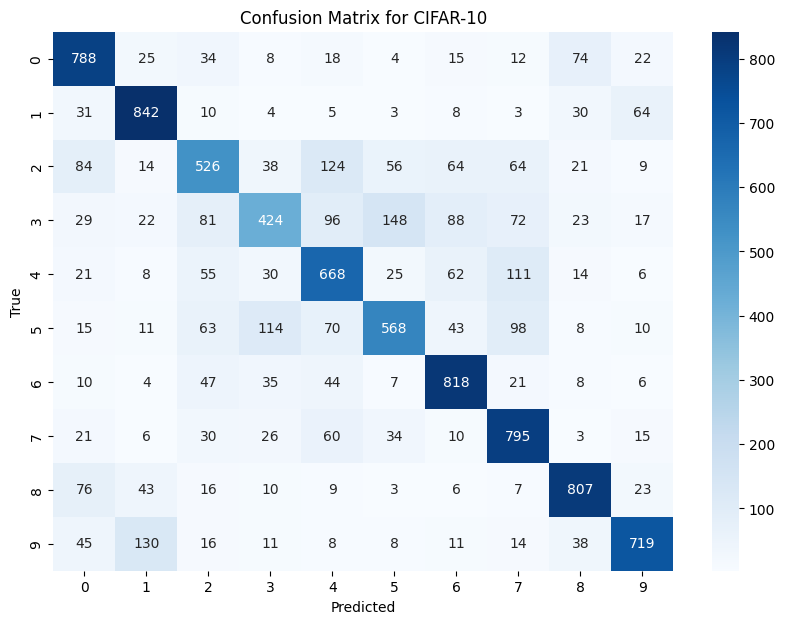

AUC Score: 0.9527


In [ ]:

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


accuracy = np.mean(y_pred_classes == y_true)
precision = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['precision']
recall = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['recall']
f1_score = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['f1-score']


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CIFAR-10')
plt.show()


auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC Score: {auc_score:.4f}")
